In [272]:
import numpy as np
import seaborn as sns
import pandas as pd

In [94]:
n, p = 100, .5
s1 = np.random.binomial(n, p, 10)
s2 = np.random.binomial(n, p, 10)
p = np.random.chisquare(10,10)

In [207]:
np.argsort(s1)
np.bincount([0, 1, 2, 2, 3, 3 , 5, 5, 6, 6, 6])
# np.argmax()

array([1, 1, 2, 2, 0, 2, 3])

<AxesSubplot:ylabel='Count'>

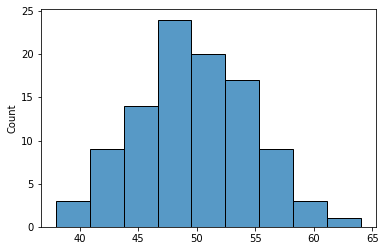

In [57]:
sns.histplot(data=s)

In [264]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        y_pred = [self._get_single_prediction(x_test_row) for x_test_row in X_test]
#         print(y_pred)
#         print(len(y_pred))
#         print("\n")
        return np.array(y_pred)

    def _get_single_prediction(self, x_test_row):
        
        distances = [self._get_euclidean_distance(x_test_row, x_train_row) 
                 for x_train_row in self.X_train]
        
#         print(len(distances))
        k_idx = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[idx] for idx in k_idx]
#         print([distances[idx] for idx in k_idx])
#         print(k_labels)
#         print(np.bincount(k_labels))
#         print(np.argmax(np.bincount(k_labels)))
        
        return np.argmax(np.bincount(k_labels))

    def _get_euclidean_distance(self, x1, x2):
        dist = np.sum((x1 - x2)**2)
        return np.sqrt(dist)

In [265]:
from sklearn import datasets
from sklearn.model_selection import KFold

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X, y = iris.data, iris.target

scores = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)

for fold, (idx_train, idx_valid) in enumerate(cv.split(X)):

    X_train, y_train = X[idx_train], y[idx_train]
    X_valid, y_valid = X[idx_valid], y[idx_valid]

    k = 3
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_valid)

    score = accuracy(y_valid, predictions)
    scores.append(score)
    
print(f"Mean Accuracy: {np.mean(scores)}")

Mean Accuracy: 0.9600000000000002


In [273]:
data = pd.DataFrame(X, columns=["feat1", "feat2", "feat3", "feat4"])

In [277]:
data["target"] = y

In [286]:
data.head()

,feat1,feat2,feat3,feat4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='feat2', ylabel='feat4'>

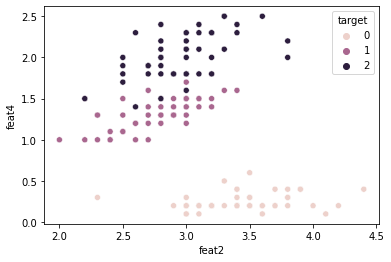

In [294]:
sns.scatterplot(data=data, x="feat2", y="feat4", hue="target")